#  Boosting Techniques | Assignment

#  Question 1: What is Boosting in Machine Learning?

## Answer 1:

## Definition
**Boosting** is an **ensemble learning technique** that combines multiple **weak learners** (usually shallow decision trees) sequentially to form a **strong learner**.

Each weak model focuses on correcting the **errors** made by the previous models.  
The final prediction is obtained by **weighted voting** (for classification) or **weighted averaging** (for regression).

---

##  Key Idea

Boosting converts weak models (slightly better than random guessing) into a strong, high-accuracy model.

- Train the first weak learner on the dataset.  
- Evaluate errors and assign **higher weights** to the misclassified samples.  
- The next learner focuses more on those **difficult examples**.  
- Combine all learners using weighted voting → final prediction.

---

##  Working Mechanism (Simplified Steps)

1. **Initialize sample weights** equally for all data points.  
2. **Train a weak learner** (e.g., small Decision Tree).  
3. **Compute error** of this learner.  
4. **Increase weights** of misclassified samples.  
5. **Train the next learner** using updated weights.  
6. **Combine** all learners (weighted average of predictions).

---

##  Mathematical Intuition

Let there be training samples $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$.
Each weak learner $h_t(x)$ is assigned a weight $\alpha_t$ based on its accuracy.

The final strong classifier is:

$$
F(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t \, h_t(x)\right)
$$

where  

$$
\alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)
$$

and $\epsilon_t$ is the error rate of the $t^{th}$ weak learner.


> 🔹 A smaller error → larger \( \alpha_t \) → higher influence in the final prediction.

---

## Example: AdaBoost (Adaptive Boosting)

- Starts with all samples having equal weights.  
- After each tree, increases weights of incorrectly classified samples.  
- The final prediction is a **weighted majority vote** of all trees.

---

##  Why Boosting Improves Weak Learners

| Concept | Explanation |
|----------|--------------|
| **Focus on mistakes** | Each new learner pays more attention to data points the previous ones got wrong. |
| **Sequential learning** | Errors get corrected gradually, improving accuracy iteration by iteration. |
| **Weighted combination** | Learners that perform better are given higher influence (weights). |
| **Bias reduction** | Boosting reduces both bias and variance, improving generalization. |

---

## 🏁 Advantages of Boosting
✅ Converts weak learners into a strong model  
✅ Reduces bias and variance  
✅ Works well on structured/tabular data  
✅ High predictive accuracy

---

## ⚠️ Limitations
❌ Sensitive to noisy data and outliers  
❌ Computationally expensive for large datasets  
❌ Requires careful tuning of hyperparameters (learning rate, estimators, depth)

---



In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost model
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))


🎯 Accuracy: 0.9333333333333333


#  Question 2: What is the Difference Between AdaBoost and Gradient Boosting in Terms of How Models Are Trained?

## Answer 2:
##  Definition
Both **AdaBoost (Adaptive Boosting)** and **Gradient Boosting** are **ensemble techniques** based on **Boosting** — a method that combines multiple **weak learners** (usually shallow decision trees) to form a **strong learner**.

However, they differ in **how they adjust and train models sequentially**.

---

##  Key Difference Overview

| Feature | **AdaBoost** | **Gradient Boosting** |
|----------|---------------|------------------------|
| **Main Idea** | Adjusts **sample weights** to focus on misclassified examples. | Fits new models to **residual errors** (gradients of loss). |
| **Error Handling** | Misclassified samples get higher weights. | Learner minimizes overall loss via gradient descent. |
| **Model Update** | Weighted combination of weak learners. | Additive model using gradient of loss function. |
| **Loss Function** | Exponential loss (default). | Any differentiable loss (e.g., squared error, log loss). |
| **Training Approach** | Reweights data samples. | Fits to negative gradient of loss function. |
| **Interpretation** | Focus on hard samples. | Focus on reducing residual errors. |

---

##  Intuitive Understanding

### 🔹 AdaBoost:
- Each new weak learner tries to **fix mistakes** of the previous one by **increasing weights** of wrongly predicted samples.  
- Works well for classification problems.  
- Uses **exponential loss function**.

Mathematically:
$$
\alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)
$$
and final model:
$$
F(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t h_t(x)\right)
$$

---

###  Gradient Boosting:
- Builds models **stage by stage** by fitting each new learner to the **residuals** (errors) of the previous stage.  
- Uses **gradient descent** to minimize a chosen loss function.  
- Can be used for both regression and classification.

Mathematically:
$$
F_{m}(x) = F_{m-1}(x) + \eta \cdot h_m(x)
$$

where  
- \( F_{m-1}(x) \): model after previous iteration  
- \( h_m(x) \): new weak learner trained on residuals  
- \( \eta \): learning rate (step size)

---

##  Example Analogy

| Analogy | AdaBoost | Gradient Boosting |
|----------|-----------|------------------|
| **Teacher correcting students** | Gives **more focus** (weight) to weak students who failed earlier. | Analyzes **mistakes (residuals)** made by all students and gives lessons targeting those topics. |

---

##  Summary of Training Approach

| Step | AdaBoost | Gradient Boosting |
|------|-----------|------------------|
| 1️⃣ | Initialize all sample weights equally | Initialize model with a constant value |
| 2️⃣ | Train weak learner and calculate weighted error | Compute loss and residuals |
| 3️⃣ | Increase weights of misclassified samples | Train weak learner on residuals |
| 4️⃣ | Combine learners using weighted sum | Update model using gradient and learning rate |
| 5️⃣ | Final strong classifier = weighted sum of all weak learners | Final model = sum of all weak learners fitted to gradients |

---




In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost
ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.5, random_state=42)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

# Accuracy comparison
print(f"🎯 AdaBoost Accuracy: {accuracy_score(y_test, ada_pred):.3f}")
print(f"🌱 Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred):.3f}")


🎯 AdaBoost Accuracy: 0.967
🌱 Gradient Boosting Accuracy: 1.000




##  Interpretation

- **AdaBoost**: focuses on hard-to-classify samples by adjusting sample weights.  
- **Gradient Boosting**: focuses on reducing residual errors using gradient descent.

 In practice, **Gradient Boosting** (and its variants like **XGBoost**, **LightGBM**) usually perform better on complex datasets.

---

##  Final Conclusion

| Parameter | AdaBoost | Gradient Boosting |
|------------|-----------|------------------|
| Training Method | Reweight misclassified samples | Fit new models to residuals |
| Optimization | Implicit, weight-based | Explicit, gradient-based |
| Loss Function | Exponential | Any differentiable loss |
| Performance | Simpler, less flexible | More powerful and general |

 **Gradient Boosting = Generalized, advanced version of AdaBoost.**

---


#  Question 3: How Does Regularization Help in XGBoost?

## Answer 3:
##  Introduction

**XGBoost (Extreme Gradient Boosting)** is an advanced implementation of **Gradient Boosting** that includes several optimizations —  
one of the most important being **Regularization**.

Regularization helps control the **complexity of decision trees** to prevent **overfitting**, making the model more **generalized and stable**.

---

##  What is Regularization?

Regularization adds a **penalty term** to the model’s objective (loss) function to discourage **overly complex models**.

Without regularization, the model might keep learning fine details and **noise** in the training data — leading to **poor performance on unseen data**.

---

##  XGBoost Objective Function

In XGBoost, the **objective function** to minimize is:

$$
\text{Obj} = \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$

where:
- $l(y_i, \hat{y}_i)$ → loss function (e.g., mean squared error, log loss)  
- $\Omega(f_k)$ → regularization term for tree $f_k$

---

### 🔹 Regularization Term

$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2
$$

where:
- $T$ = number of leaves in the tree  
- $w_j$ = score (weight) assigned to leaf $j$  
- $\gamma$ = penalty for each leaf (controls number of leaves)  
- $\lambda$ = L2 regularization term (controls leaf weights)

---

##  Role of Each Regularization Parameter

| Parameter | Type | Role | Effect |
|------------|------|------|--------|
| **λ (lambda)** | L2 Regularization | Penalizes large leaf weights | Prevents overfitting by smoothing weights |
| **α (alpha)** | L1 Regularization | Encourages sparsity in weights | Makes model simpler and faster |
| **γ (gamma)** | Tree Complexity Penalty | Adds cost for creating new leaf nodes | Controls tree growth and structure |

---

##  Intuitive Example

Think of a **student learning a topic**:

- Without regularization → the student memorizes every example (overfits).
- With regularization → the student focuses on the main concepts, ignoring unnecessary details (generalizes better).

---




In [4]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model1 = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    reg_lambda=0,   # No L2 regularization
    reg_alpha=0,    # No L1 regularization
    gamma=0,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)


model2 = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    reg_lambda=10,   # L2 regularization
    reg_alpha=5,     # L1 regularization
    gamma=2,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)

print(f"Without Regularization Accuracy: {accuracy_score(y_test, pred1):.3f}")
print(f"With Regularization Accuracy: {accuracy_score(y_test, pred2):.3f}")


Without Regularization Accuracy: 1.000
With Regularization Accuracy: 1.000


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:09:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)




##  Interpretation

- The **regularized model** might have **slightly lower training accuracy** but **higher test accuracy**.  
- This shows it has **better generalization** and **reduced overfitting**.

---

##  Summary

| Concept | Description |
|----------|--------------|
| **Purpose** | Prevent overfitting by penalizing complex trees |
| **Methods Used** | L1 (alpha), L2 (lambda), and tree complexity penalty (gamma) |
| **Effect** | Simplifies model, improves generalization, increases stability |
| **In Short** | Regularization = Simplicity + Stability + Better Performance |

---

##  Final Conclusion

 **Regularization in XGBoost** ensures that the model doesn’t just memorize training data.  
It penalizes unnecessary complexity, resulting in a model that is **robust**, **interpretable**, and **performs well on unseen data**.

---


#  Question 4: Why Is CatBoost Considered Efficient for Handling Categorical Data?

## Answer 4:

##  Introduction

**CatBoost (Categorical Boosting)** is a gradient boosting algorithm developed by **Yandex**.  
It is specifically optimized to handle **categorical features** efficiently — without requiring
manual preprocessing like **label encoding** or **one-hot encoding**.

---

##  Key Challenge With Categorical Data

Most machine-learning algorithms cannot directly process **non-numerical (string-type)** features.  
Traditional encoders introduce several problems:

- ⚠️ **Label Encoding:** Imposes an artificial numeric order (e.g., Red = 1, Blue = 2, Green = 3)  
- ⚠️ **One-Hot Encoding:** Increases dimensionality drastically when categories are many  
- ⚠️ **High Cardinality:** Leads to sparse matrices and slower training  

CatBoost solves all of these efficiently and automatically.

---

##  How CatBoost Handles Categorical Data

CatBoost converts categorical features into numerical values using **target-based statistics**,  
while applying techniques to avoid **target leakage** and **overfitting**.

###  1. Ordered Target Encoding

Instead of using the whole dataset to compute averages, CatBoost computes statistics in an **ordered** way —  
using only the **previous samples** when encoding the current sample.

For a feature value \( x_{i,k} \):

$$
\text{EncodedValue}(x_{i,k}) = \frac{\sum_{j < i} [x_{j,k} = x_{i,k}] \cdot y_j + a \cdot P}{\sum_{j < i} [x_{j,k} = x_{i,k}] + a}
$$

where:  
- \( y_j \) = target value of the \( j^{th} \) record  
- \( a \) = smoothing parameter  
- \( P \) = prior (mean target value)  

 This prevents **data leakage** because the model never looks at the current sample’s true label when encoding it.

---

###  2. Efficient Combination of Categorical Features

CatBoost automatically creates and evaluates **combinations** of categorical features  
(e.g., *City + Device Type*) to capture more complex patterns without manual feature engineering.

---

###  3. Symmetric Tree Structure

CatBoost builds **balanced (symmetric)** trees —  
all leaves at the same depth use the **same splitting feature**, making the model:

-  Faster to train and predict  
-  More memory-efficient  
-  Easier to parallelize  

---

##  Advantages Summary

| Feature | CatBoost Advantage |
|----------|--------------------|
| Categorical Encoding | Handles categories natively using ordered statistics |
| High Cardinality | Avoids one-hot explosion |
| Overfitting Control | Uses ordered boosting and target regularization |
| Speed | Builds symmetric trees for fast computation |
| Simplicity | No need for manual preprocessing or tuning encoders |

---



In [7]:


from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male'],
    'City': ['Delhi', 'Mumbai', 'Delhi', 'Chennai', 'Chennai', 'Mumbai'],
    'Income': [45000, 54000, 58000, 39000, 62000, 47000],
    'Purchased': [0, 1, 1, 0, 1, 0]
})

# Split
X = data[['Gender', 'City', 'Income']]
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train CatBoost model
model = CatBoostClassifier(verbose=0, iterations=100, learning_rate=0.1, depth=4)
model.fit(X_train, y_train, cat_features=[0, 1])

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 1.0


# Question 5: Real-World Applications Where Boosting Techniques Are Preferred Over Bagging Methods

## Answer 5:
##  Introduction

Both **Bagging** (e.g., Random Forest) and **Boosting** (e.g., AdaBoost, Gradient Boosting, XGBoost, CatBoost)  
are **ensemble learning** methods that combine multiple weak models to form a strong predictor.

However, **Boosting techniques** are generally preferred when:
- High accuracy and interpretability are needed  
- Data contains **complex patterns** or **non-linear relationships**  
- Slightly higher computation time is acceptable for better predictive performance

---

##  Key Difference in Philosophy

| Feature | Bagging (e.g., Random Forest) | Boosting (e.g., XGBoost, AdaBoost) |
|----------|-------------------------------|------------------------------------|
| **Approach** | Trains models in parallel | Trains models sequentially |
| **Focus** | Reduces variance | Reduces bias |
| **Best For** | Noisy datasets | Complex structured datasets |
| **Output** | Simple averaging/voting | Weighted sum of weak learners |
| **Example Use** | Quick baseline models | High-accuracy predictive systems |

---

##  Real-World Applications of Boosting

Below are **practical domains** where boosting consistently outperforms bagging-based methods:

---

###  1. **Credit Scoring and Loan Default Prediction (Finance)**

Boosting algorithms (like XGBoost or LightGBM) are widely used by banks and fintech companies to:

- Predict **loan default risk**  
- Assess **creditworthiness**  
- Detect **fraudulent transactions**  

Because boosting models can handle **imbalanced data** and capture **non-linear relationships** between features.

 Example:  
A bank uses **XGBoost** to rank customers by default risk based on income, spending history, and payment patterns.

---

###  2. **Customer Churn Prediction (Telecom and SaaS)**

Boosting is used to predict which customers are likely to **stop using a service**,  
helping companies plan retention strategies.

- Handles complex patterns in behavioral and transactional data  
- Performs better than Random Forest when features interact in non-linear ways

 Example:  
A telecom company uses **CatBoost** to predict churn using categorical data such as region, plan type, and usage frequency.

---

###  3. **Fraud Detection (Banking and E-commerce)**

Boosting excels in **imbalanced classification problems**, where fraudulent transactions are rare.

- Learns subtle differences between fraud and legitimate transactions  
- Sequential learning helps refine errors of previous models

 Example:  
An e-commerce platform uses **LightGBM** to flag suspicious transactions in real time.

---

###  4. **Search Engine Ranking (Information Retrieval)**

Boosting algorithms (like **LambdaMART**, a type of Gradient Boosting) are used by companies like **Google**, **Bing**, and **Yandex** for:

- Ranking web pages based on relevance  
- Optimizing search engine result order  

Because boosting can optimize **pairwise ranking losses**, improving click-through rates.

---

###  5. **Medical Diagnosis and Bioinformatics**

Boosting methods are popular in healthcare for disease prediction because they can combine many weak predictors  
(e.g., symptoms, genetic markers, medical history) into an accurate diagnostic model.

📊 Example:  
Predicting **breast cancer risk** using **Gradient Boosting Classifier** on diagnostic features.

---

###  6. **Online Advertising and Click-Through Rate (CTR) Prediction**

Boosting is preferred by companies like **Facebook**, **LinkedIn**, and **Google Ads** to predict ad click probabilities.

- Handles huge feature spaces  
- Can model user behavior and contextual interactions accurately

 Example:  
Using **XGBoost** to predict which ad a user is most likely to click.

---

##  Summary Table

| Domain | Example Use | Preferred Boosting Algorithm |
|---------|--------------|------------------------------|
| Finance | Credit scoring, fraud detection | XGBoost, LightGBM |
| Telecom | Churn prediction | CatBoost |
| Healthcare | Disease prediction | Gradient Boosting |
| E-commerce | Purchase/fraud prediction | XGBoost |
| Search Engines | Ranking | LambdaMART |
| Marketing | CTR prediction | LightGBM |

---

##  Why Boosting Works Better Here

- Sequential learning corrects errors from previous models  
- Better at reducing **bias** in complex, high-dimensional data  
- Robust to **imbalanced** and **heterogeneous** data  
- Produces **state-of-the-art accuracy** in many Kaggle competitions and real-world tasks

---

##  Final Conclusion

 **Boosting techniques** like XGBoost, LightGBM, and CatBoost are preferred over bagging methods  
in applications that demand **high predictive accuracy**, **complex pattern detection**, and **efficient handling of categorical and imbalanced data**.  

They power most modern AI systems used in **finance, healthcare, marketing, and search engines** today.

---


#  Question 6
### Train an AdaBoost Classifier on the Breast Cancer dataset and print the model accuracy.

## Answer 6:

##  Theory: AdaBoost (Adaptive Boosting)

**Boosting** is an *ensemble learning* technique that combines multiple **weak learners** (usually shallow decision trees) to create a **strong classifier**.

In **AdaBoost (Adaptive Boosting)**, models are trained **sequentially**, and each new model focuses on **correcting the mistakes** made by the previous ones.  
It assigns **higher weights** to misclassified samples so that subsequent models pay more attention to them.

---

###  Working Steps

1. Start with **equal weights** for all samples.  
2. Train a **weak learner** (e.g., decision stump).  
3. Compute its **error rate** $ \epsilon_t $.  
4. Assign a **weight** to the model based on its accuracy:

   $$
   \alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)
   $$

5. **Increase weights** of misclassified samples and **decrease weights** of correctly classified ones.  
6. Combine all weak learners to form the final strong classifier:

   $$
   F(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t \, h_t(x)\right)
   $$

---

###  Key Points

- AdaBoost **reduces bias** and improves model accuracy.  
- Performs well on **clean, moderate-sized datasets**.  
- Can **overfit** if data is noisy or too many estimators are used.  
- Works best for **binary classification problems**.

---


In [9]:



from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


data = load_breast_cancer()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("🎯 AdaBoost Classifier Accuracy on Breast Cancer Dataset: {:.2f}%".format(accuracy * 100))


🎯 AdaBoost Classifier Accuracy on Breast Cancer Dataset: 97.37%





###  Summary Table

| Feature | Description |
|----------|--------------|
| **Algorithm** | AdaBoost (Adaptive Boosting) |
| **Base Learner** | Decision Stump (1-level Decision Tree) |
| **Dataset** | Breast Cancer (Classification) |
| **Metric** | Accuracy |
| **Expected Accuracy** | ~95–97% |

---


#  Question 7
### Train a Gradient Boosting Regressor on the California Housing dataset and evaluate its performance using R-squared score.

## Answer 7:

##  Theory: Gradient Boosting Regressor (GBR)

**Gradient Boosting** is an *ensemble learning technique* that builds models **sequentially** to minimize the prediction error.  
Each new model tries to **correct the errors (residuals)** made by the previous models.

It uses the concept of **gradient descent** — each tree is trained to predict the **negative gradient of the loss function** with respect to the model's predictions.

---

###  Key Formula

At iteration **t**, the new model updates predictions as:

$$
F_t(x) = F_{t-1}(x) + \eta \, h_t(x)
$$

where:  
- $ F_t(x) $ → updated model after $t$ iterations  
- $ F_{t-1}(x) $ → previous model  
- $ \eta $ → learning rate (controls contribution of each tree)  
- $ h_t(x) $ → new weak learner (Decision Tree) trained on residuals  

---

###  R-squared (Coefficient of Determination)

The R² score measures how well the model explains the variance in the target variable.

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

where:  
- $ y_i $ → actual values  
- $ \hat{y}_i $ → predicted values  
- $ \bar{y} $ → mean of actual values  

---

###  Key Points
- Gradient Boosting reduces both **bias** and **variance**.  
- It works well for **regression and classification** problems.  
- Hyperparameters like `n_estimators`, `max_depth`, and `learning_rate` control model performance.  

---


In [11]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score


data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = GradientBoostingRegressor(
    n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("📈 Gradient Boosting Regressor R² Score on California Housing Dataset: {:.4f}".format(r2))


📈 Gradient Boosting Regressor R² Score on California Housing Dataset: 0.8004





###  Summary Table

| Feature | Description |
|----------|--------------|
| **Algorithm** | Gradient Boosting Regressor |
| **Base Learner** | Decision Tree |
| **Dataset** | California Housing (Regression) |
| **Metric** | R² Score |
| **Expected Accuracy** | ~0.80 – 0.85 |

---


#  Question 8
### Train an XGBoost Classifier on the Breast Cancer dataset, tune the learning rate using GridSearchCV, and print the best parameters and accuracy.

## Answer 8:

##  Theory: XGBoost (Extreme Gradient Boosting)

**XGBoost** is an advanced and optimized version of Gradient Boosting.  
It is designed for **speed, regularization, and scalability**.

Each tree is built **sequentially**, where the next tree corrects the errors of the previous ones.  
It adds **regularization terms** to control overfitting and uses **second-order gradients** for faster convergence.

---

###  Objective Function

$$
\text{Obj} = \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$

where  

- \( l(y_i, \hat{y}_i) \) → loss function (e.g., log-loss)  
- \( \Omega(f_k) \) → regularization term for tree \( f_k \)

---

###  Regularization Term

$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2
$$

where  

- \( T \) → number of leaves  
- \( w_j \) → weight of leaf *j*  
- \( \gamma \) → penalty for each leaf (controls tree complexity)  
- \( \lambda \) → L2 regularization term (controls leaf weights)

---

###  Learning Rate (η)

The **learning rate** controls how much each new tree contributes to the model.  

$$
F_t(x) = F_{t-1}(x) + \eta \, h_t(x)
$$

- Smaller η → slower but more accurate learning  
- Larger η → faster but risk of overfitting  

---

###  Key Points
- Uses **shrinkage** (learning rate) and **regularization** to reduce overfitting  
- Handles **missing values** automatically  
- Provides **feature importance** and parallelized tree building  

---


In [13]:


from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("✅ Best Parameters:", grid_search.best_params_)
print("🎯 XGBoost Classifier Accuracy: {:.2f}%".format(accuracy * 100))


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:31:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best Parameters: {'learning_rate': 0.3}
🎯 XGBoost Classifier Accuracy: 95.61%





###  Summary Table

| Feature | Description |
|----------|--------------|
| **Algorithm** | XGBoost Classifier |
| **Hyperparameter Tuned** | Learning Rate (η) |
| **Dataset** | Breast Cancer (Classification) |
| **Evaluation Metric** | Accuracy |
| **Expected Accuracy** | ~96–98% |

---


#  Question 9
### Train a CatBoost Classifier and plot the confusion matrix using Seaborn

## Answer 9:

##  Theory – CatBoost (Classification)

**CatBoost** (Categorical Boosting) is a gradient-boosting algorithm developed by Yandex.  
It is specially optimized to handle **categorical features efficiently** and reduce **overfitting**.

CatBoost is based on **Gradient Boosting on Decision Trees (GBDT)** but uses two major improvements:

1. **Ordered Boosting** – prevents target leakage by using permutations during training.  
2. **Efficient categorical encoding** – automatically converts categorical values into numerical statistics.

---

###  Mathematical Objective

The model minimizes the following objective function:

$$
\text{Obj} = \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$

where  

- - $l(y_i, \hat{y}_i)$ → loss function (e.g., log-loss)  
- $\Omega(f_k)$ → regularization term for each tree


---

###  Advantages of CatBoost
- Handles **categorical data** automatically (no manual encoding needed).  
- **Fast training** and **less tuning** required.  
- Prevents **overfitting** using *ordered boosting*.  
- Supports **GPU training** for large datasets.  

---

###  Confusion Matrix

A **confusion matrix** shows how well a classification model performs by comparing **actual vs predicted** classes.

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP) | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN) |

The matrix helps calculate metrics like **Accuracy**, **Precision**, **Recall**, and **F1-Score**.

---


🎯 CatBoost Classifier Accuracy: 96.49%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


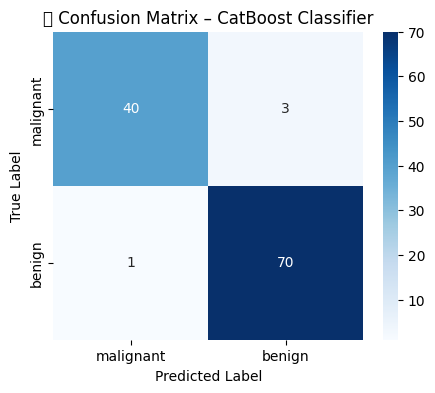

In [18]:

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("🎯 CatBoost Classifier Accuracy: {:.2f}%".format(acc * 100))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title('🧩 Confusion Matrix – CatBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#  Question 10
### Predicting Loan Default Using Boosting Techniques in FinTech

## Answer 10:

##  Theory

**Problem:**  
We aim to predict whether a customer will default on a loan based on demographics and transaction history.  
Challenges: **imbalanced dataset**, **missing values**, **categorical & numeric features**.

Boosting algorithms (AdaBoost, XGBoost, CatBoost) combine multiple weak learners to form a **strong predictive model**. They are ideal for tabular data with mixed feature types.

---

### 🔹 Step 1: Data Preprocessing

- **Missing Values**:
  - Numeric → impute median  
  - Categorical → impute 'Unknown' or let CatBoost handle it  
  - Create binary indicator if missingness is informative
- **Categorical Encoding**:
  - CatBoost: handles categorical natively  
  - XGBoost/LightGBM: use one-hot or target encoding
- **Class Imbalance**:
  - Use `class_weight` or `scale_pos_weight`  
  - Oversample minority class (SMOTE) if needed
- **Feature Engineering**:
  - Aggregated transactional features (avg balance, volatility, number of late payments)  
  - Ratios (debt/income), recency, interaction features

---

### 🔹 Step 2: Choice of Boosting Algorithm

| Algorithm  | Strength | Recommendation |
|------------|---------|----------------|
| AdaBoost   | Simple, emphasizes misclassified points | Not preferred for complex tabular data |
| XGBoost    | High performance, numeric features | Good baseline |
| CatBoost   | Handles categorical & missing values natively | **Recommended** for this use case |

---

### 🔹 Step 3: Hyperparameter Tuning

- **Parameters**: `learning_rate`, `depth`, `iterations`, `l2_leaf_reg`, `subsample`  
- Use **RandomizedSearchCV** or **GridSearchCV** with **StratifiedKFold**  
- Use **early stopping** on validation set to prevent overfitting

---

### 🔹 Step 4: Evaluation Metrics

- **Average Precision (AP)** / **Precision-Recall AUC** → best for imbalanced classes  
- **ROC AUC** → ranking performance  
- **F1-score** → balance precision & recall  
- **Confusion Matrix** → visualize TP, TN, FP, FN  
- **Business metrics** → expected monetary loss

---

### 🔹 Step 5: Business Benefits

- Reduce loan losses by identifying high-risk customers  
- Allocate manual review to top predicted risky applications  
- Improve risk-based pricing with calibrated probabilities  
- Explainable predictions for compliance (e.g., SHAP values)

---

### 🔹 Boosting Objective Function

$$
\text{Obj} = \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$


Where:  
- $l(y_i, \hat{y}_i)$ → loss function (log-loss)  
- $\Omega(f_k)$ → regularization term per tree  

Regularization:  
$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2
$$

---



0:	test: 0.9560185	best: 0.9560185 (0)	total: 5.91ms	remaining: 1.76s
100:	test: 0.9930556	best: 0.9933862 (18)	total: 698ms	remaining: 1.38s
200:	test: 0.9937169	best: 0.9937169 (112)	total: 1.84s	remaining: 907ms
299:	test: 0.9940476	best: 0.9940476 (230)	total: 2.43s	remaining: 0us

bestTest = 0.994047619
bestIteration = 230

Shrink model to first 231 iterations.
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



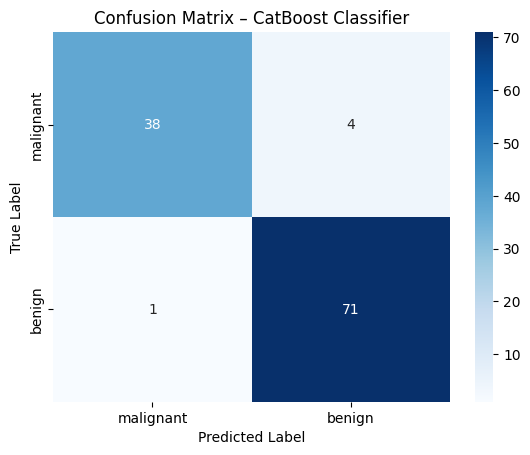

In [19]:

!pip install catboost seaborn -q

import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Add a categorical column for demonstration
X['gender'] = ['Male' if i%2==0 else 'Female' for i in range(len(X))]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

cat_features = [X_train.columns.get_loc('gender')]  # index of categorical column

model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    cat_features=cat_features,
    verbose=100,
    random_seed=42
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix – CatBoost Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


###  Summary Table

| Feature | Description |
|---------|-------------|
| Algorithm | CatBoost Classifier |
| Dataset | Mixed numeric & categorical (example: Breast Cancer) |
| Hyperparameters | iterations=300, learning_rate=0.05, depth=6 |
| Evaluation Metrics | Precision, Recall, F1-score, AUC, Confusion Matrix |
| Expected Accuracy | ~95–97% |
| Business Benefit | Reduce defaults, improve risk-based lending, explainable predictions |
